** Created by Hyeyoung Ryu and Jaekeun Lee

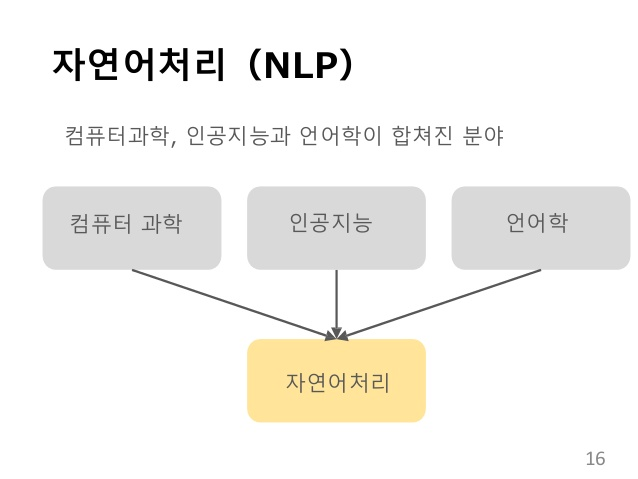

<div style="text-align: right"> (이미지 출처 = https://www.slideshare.net/ssuser06e0c5/i-64267027) </div>

# Natural Language Processing (NLP)

"NLP is a field of computer science, artificial intelligence concerned with the interactions between computers and human languages (natural languages) and in particular, processing the large natural language data."   
                             - wikipedia- 

Simply saying, NLP processing is using computers to analyze, understand and derive meaning from human languages. It is used to analyze text, allowing machines to understand how human's speak. 

자연어처리는 컴퓨터로 하여금 인간의 언어를 이해할 수 있는 형태로 만들거나, 대량의 언어를 분석하여 의미있는 결과를 생성해 내는 것 입니다.

## 1. Application of NLP

### NLP 적용 사례

- Text summarization
- Chatbot creation
- Identify the type of entity extracted (Named Entity Recognition)
- Sentiment Analysis
- Stemming (Reduce words to their roots and organize them)

- 텍스트 요약
- 챗봇 생성 및 구현
- 개체명 인식 및 분류 (Named Entity Recognition)
- 감정분석
- 어간추출

### Open Source NLP Libraries -  오픈소스 자연어 처리 라이브러리

- Stanford NLP
- NLTK (Natural Language Toolkit)
- Apache OpenNLP
- Konlpy     --> 한국어

## 2. NLP terminologies - NLP 관련 용어들

### -  Tokenization - 토큰화

Process of breaking up the given text into units
In case of english, space is sufficient enough. 

텍스트 또는 텍스트 집합을 가져와서 개별 단어 단위로 분리하는 것
영어를 토큰화 할 때는, 공백을 사용하는 것이 거의 전부입니다. 

### - Stemming / Lemmatization - 어간추출 / 표제어추출

Stemming

- Process of reducing inflected words to their word stem
- 어형이 변형된 단어로부터 접사를 제거하고, 그 단어의 어간을 분리해 내는 것을 의미

Lemmatization

- Algorithmic process of determining the lemma of word based on its intended meaning
- 어간추출에 더하여, 문장 속에서 단어가 어떠한 뜻으로 쓰였는지까지 결정하는 과정. 


examples)

|Word|stemming|lemmatization|
|----|--------|-------------|
|Love|Lov|Love|
|Loves|Lov|Love|
|Loved|Lov|Love|
|Loving|Lov|Love|
|Innovation|Innovat|Innovation|
|Innovations|Innovat|Innovation|
|Innovate|Innovat|Innovate|
|Innovates|Innovat|Innovate|
|Innovative|Innovat|Innovative|


### - Corpus - 말뭉치

list of words / 글자들의 나열

## 3. 한국어 분석 (형태소 분석)

한국어 분석을 하기 위해서는 형태소 분석이 필수입니다. 영어의 경우 공백으로 쉽게 분리가 되지만, 한국어에는 조사가 붙어 있으므로, 공백만으로는 단어 구분이 상당히 어려워집니다. 따라서, 한국어 문장을 분리할 때는 최소 단위인 형태소를 이용합니다. 

Konply 는 5가지 종류의 형태소 분석기가 있습니다: 한나눔, 꼬꼬마, Komoran, MeCab, Twitter

분석기 사용법은 대부분 비슷합니다

In [4]:
!pip3 install konlpy
!pip3 install jpype1
from konlpy.tag import Twitter  # Twitter이라는 형태소 분석기 불러오기
twitter = Twitter()

mylist = twitter.pos("아버지 가방에 들어가신다", norm=True, stem=True)
print(mylist)

  Using cached JPype1-0.6.2.tar.gz
  Running setup.py bdist_wheel for jpype1 ... done
  Stored in directory: /Users/angieryu2202/Library/Caches/pip/wheels/8e/f3/e6/a1250b8e8d2bd105f4dd21b1dc801dbcf5d815592443bfe741
Successfully built jpype1


NameError: name 'jpype' is not defined

#### 단어 출현 빈도 분석

저번 시간에 만든 news.tsv를 활용하여 단어 출현 빈도를 분석해보자.

In [6]:
import pandas as pd
f = pd.read_csv("/Users/angieryu2202/Desktop/news.tsv",
                delimiter='\t', encoding="CP949")

f.head()

,Unnamed: 0,contents,dates,newscomp,reporters,titles
0,1,북으로 돌아가는 현송월 일행(파주=연합뉴스) 김주성 기자 = 현송월 삼지연관현악단 ...,2018-01-22,연합뉴스,이정진,"현송월 일행, 남측 CIQ통과…1박2일 방남일정 마치고 北 귀환(종합)"
1,2,북으로 돌아가는 현송월 일행(파주=연합뉴스) 김주성 기자 = 현송월 삼지연관현악단 ...,2018-01-22,연합뉴스,이정진,"현송월 일행, 남측 CIQ통과…경의선 육로로 北 귀환"
2,3,"민주 ""공정한 방송 재탄생 기대"", 정의당 ""정상화에 서광""한국 ""야만적인 폭거"",...",2018-01-22,연합뉴스,김남권,"여야, 고대영 KBS 사장 해임 의결에 상반된 반응"
3,4,"고대영 사장 해임, 기뻐하는 KBS 새노조(서울=연합뉴스) 22일 서울 여의도 KB...",2018-01-22,연합뉴스,오수진,"KBS이사회, 고대영 사장 해임제청…""공정보도 훼손""(종합2보)"
4,5,역대 KBS 사장 중 세번째…약 두 달 만에 공영방송사 사장 모두 해임 집회 벌이는...,2018-01-22,연합뉴스,오수진,해 넘긴 장기 파업에 고대영 KBS 사장 결국 퇴진


In [7]:
data = []
for x in f["contents"]:
    data.append(x)

manywords = " ".join(data) # 모든 contents 데이터를 하나의 string으로 만들기

In [8]:
from konlpy.tag import Twitter  # Twitter이라는 형태소 분석기 불러오기
twitter = Twitter()

word_dic = {}
lines = manywords.split("\n")
for line in lines:
    mylist = twitter.pos(line)
    for word in mylist:
        if word[1] == "Noun":
            if not (word[0] in word_dic):
                word_dic[word[0]] = 0
            word_dic[word[0]] +=1

#많이 사용된 명사 출력
keys = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
for word, count in keys[:50]:
    print("{0}({1}) ".format(word,count), end="")

NameError: name 'jpype' is not defined

## 4. English Analysis - NLTK

In [ ]:
import nltk
nltk.download() # prefer download all

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [10]:
from nltk.tokenize import sent_tokenize, word_tokenize
# source: http://www.bbc.com/news/world-europe-42731505

Example_text = 'Three people died after being hit by falling trees and debris in the Netherlands and one in Germany. A second German was killed in a collision when his van was blown on to the wrong side of the road.  Facing gusts of up to 140km/h (90mph), Germany\'s train operator Deutsche Bahn cancelled all long-distance services for the rest of Thursday.  Many regional services were also cancelled. Flights at Schiphol airport in Amsterdam - one of the busiest in Europe - were briefly suspended and two of its three departure halls were closed after roof plates were blown off the terminal building.  More than 300 flights were cancelled and the airport said passengers should check their flights status online or contact their airline.  People arriving at Schiphol told reporters they had experienced rough landings with some passengers around them throwing up.  The storm, called Friederike in Germany, is due to cross the country from west to east before reaching Poland overnight. It caused high winds in the UK on Wednesday night and Thursday morning, bringing down trees and knocking out power to tens of thousands of homes.  German meteorologists are warning people to stay indoors, and many schools are closed.  The national train operator, Deutsche Bahn, had already suspended rail traffic in North Rhine-Westphalia (NRW), neighbouring Rhineland-Palatinate state and Lower Saxony, when it announced a Germany-wide suspension of long-distance trains. Any regional trains still running have cut their speed because of the strong winds.  A spokesman said it was the "right decision" due to the risk of trees falling on overhead wires and on tracks.  Many domestic flights have also been cancelled.  An emergency siren wailed in the city of Duisburg, warning residents that they should stay indoors, German news website WDR reported. Twitter users have posted photos of trucks and trees blown over by the gales. Many trees have come down on railway lines.  Police temporarily closed the centre of Almere, a Dutch city with about 200,000 residents lying just east of Amsterdam.  They tweeted an alert warning people to stay at home because of risk from the storm. A national transport website, VID, reported that at least 17 trucks had been blown over by the strong winds.  The Dutch Railways (NS) and operator ProRail said overhead power lines had been damaged by the wind, as well as some railway tracks.  An alert on the NS website said that "at most, only a few trains" would run throughout the evening.'

file = open("sampledoc.txt", "w",encoding="utf-8")
file.write('Three people died after being hit by falling trees and debris in the Netherlands and one in Germany. A second German was killed in a collision when his van was blown on to the wrong side of the road.  Facing gusts of up to 140km/h (90mph), Germany\'s train operator Deutsche Bahn cancelled all long-distance services for the rest of Thursday.  Many regional services were also cancelled. Flights at Schiphol airport in Amsterdam - one of the busiest in Europe - were briefly suspended and two of its three departure halls were closed after roof plates were blown off the terminal building.  More than 300 flights were cancelled and the airport said passengers should check their flights status online or contact their airline.  People arriving at Schiphol told reporters they had experienced rough landings with some passengers around them throwing up.  The storm, called Friederike in Germany, is due to cross the country from west to east before reaching Poland overnight. It caused high winds in the UK on Wednesday night and Thursday morning, bringing down trees and knocking out power to tens of thousands of homes.  German meteorologists are warning people to stay indoors, and many schools are closed.  The national train operator, Deutsche Bahn, had already suspended rail traffic in North Rhine-Westphalia (NRW), neighbouring Rhineland-Palatinate state and Lower Saxony, when it announced a Germany-wide suspension of long-distance trains. Any regional trains still running have cut their speed because of the strong winds.  A spokesman said it was the "right decision" due to the risk of trees falling on overhead wires and on tracks.  Many domestic flights have also been cancelled.  An emergency siren wailed in the city of Duisburg, warning residents that they should stay indoors, German news website WDR reported. Twitter users have posted photos of trucks and trees blown over by the gales. Many trees have come down on railway lines.  Police temporarily closed the centre of Almere, a Dutch city with about 200,000 residents lying just east of Amsterdam.  They tweeted an alert warning people to stay at home because of risk from the storm. A national transport website, VID, reported that at least 17 trucks had been blown over by the strong winds.  The Dutch Railways (NS) and operator ProRail said overhead power lines had been damaged by the wind, as well as some railway tracks.  An alert on the NS website said that "at most, only a few trains" would run throughout the evening.')
file.close()

In [11]:
print(sent_tokenize(Example_text)) # Sentence Tokenize

['Three people died after being hit by falling trees and debris in the Netherlands and one in Germany.', 'A second German was killed in a collision when his van was blown on to the wrong side of the road.', "Facing gusts of up to 140km/h (90mph), Germany's train operator Deutsche Bahn cancelled all long-distance services for the rest of Thursday.", 'Many regional services were also cancelled.', 'Flights at Schiphol airport in Amsterdam - one of the busiest in Europe - were briefly suspended and two of its three departure halls were closed after roof plates were blown off the terminal building.', 'More than 300 flights were cancelled and the airport said passengers should check their flights status online or contact their airline.', 'People arriving at Schiphol told reporters they had experienced rough landings with some passengers around them throwing up.', 'The storm, called Friederike in Germany, is due to cross the country from west to east before reaching Poland overnight.', 'It ca

In [12]:
print(word_tokenize(Example_text)) # Word Tokenize

['Three', 'people', 'died', 'after', 'being', 'hit', 'by', 'falling', 'trees', 'and', 'debris', 'in', 'the', 'Netherlands', 'and', 'one', 'in', 'Germany', '.', 'A', 'second', 'German', 'was', 'killed', 'in', 'a', 'collision', 'when', 'his', 'van', 'was', 'blown', 'on', 'to', 'the', 'wrong', 'side', 'of', 'the', 'road', '.', 'Facing', 'gusts', 'of', 'up', 'to', '140km/h', '(', '90mph', ')', ',', 'Germany', "'s", 'train', 'operator', 'Deutsche', 'Bahn', 'cancelled', 'all', 'long-distance', 'services', 'for', 'the', 'rest', 'of', 'Thursday', '.', 'Many', 'regional', 'services', 'were', 'also', 'cancelled', '.', 'Flights', 'at', 'Schiphol', 'airport', 'in', 'Amsterdam', '-', 'one', 'of', 'the', 'busiest', 'in', 'Europe', '-', 'were', 'briefly', 'suspended', 'and', 'two', 'of', 'its', 'three', 'departure', 'halls', 'were', 'closed', 'after', 'roof', 'plates', 'were', 'blown', 'off', 'the', 'terminal', 'building', '.', 'More', 'than', '300', 'flights', 'were', 'cancelled', 'and', 'the', 'air

## 5. Sentiment Analysis - 감정분석

Sentiment Analysis aims to determine the attitude of a speaker, writer or other subjects with respect to some topic or the overall contextual polarity or emotional reaction to document, interaction or event.

감정분석은 화자, 저자의 태도, 혹은 특정 주제나 맥락에 따른 감정의 치우침, 혹은 문서를 비롯한 사건들과 매체에 대한 감정적인 반응의 정도를 살피기 위한 목적으로 이루어 진다.

In [15]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

sid.polarity_scores(Example_text)

# polarity score의 compound는 부정과 긍정을 (-1,1) 나타낸 값이다.
# 위의 예의 같은 경우는 매우 부정적인 감정이 다분한 기사라고 볼 수 있다.
## (실제로 위의 Example_text 기사는 허리케인으로 인한 피해자들에 대해 다루고 있다"

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/angieryu2202/nltk_data...


{'compound': -0.988, 'neg': 0.126, 'neu': 0.841, 'pos': 0.034}

## 6. Word Vectorizing

In natural language processing (NLP) tasks (easily put, processing the human language to a machine-understandable language), the first step is to represent a document as an element in a vector space. In word vectorization (especially word2vec), a distributed assumption is adapted, which states that words that appear in the same context are semantically closer than the words that do not share the same context. Using this principle, a word can be represented as points in a continous vector space, where semantically similar words correspond to nearby points. Essentially, the weight of each word in the vector is distributed across many dimensions.The dimensions are believed to capture the semantic properties of the words.

<div>출처: https://www.packtpub.com/books/content/vector-representation-words </div>

### 6-1. TF (Term Frequency) & IDF (Inverse Document Frequency)

정보검색과 텍스트 마이닝에서 이용하는 가중치로, 여러 문서로 이루어진 문서군이 있을 때, 어떤 단어가 특정 문서 내에서 얼마나 중요한 것 인지를 나타내는 통계적인 수치이다.

Words in the document with a high TF-IDF score occcur frequently in the document and provide the most information about that specific document. First, it picks the most frequently occurring terms, in other words, tf. The second step to take is to measure how infrequently the word occurs across all documents which is idf. The third step is to multiply tf and idf which gives the product of how frequently a word appers in a document and the extent of the word's uniqueness in the entire corpus of a document.

#### Term Frequency (TF) - 단어 빈도

특정 단어가 __문서__(Document) 내에 얼마나 자주 등장하는 지를 나타내는 값. 이 값이 높을 수록 문서에서 중요하다고 생각할 수 있다.

#### Inverse Document Frequency (IDF) - 역문서빈도

단어가 __문서군__(Document"s") 내에서 자주 사용되는 경우, 이것은 그 단어가 흔하게 등장한다는 것을 의미한다. 이것은 DF(문서 빈도)라고 하며, 이 값의 역수를 IDF라고 한다.

#### TF-IDF 
TF 곱하기 IDF

<출처:위키피디아>

In [16]:
# pip install textblob
import math
#TextBlob is used for breaking up the text into words and getting the word counts
from textblob import TextBlob as tb

#"Term frequency" computes the number of times a word appears in a document blob, normalized by dividing by the total number of words in blob
def tf(word, blob):
    return blob.words.count(word) / len(blob.words)
#N_containing returns the number of documents containing the word
def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)
#"Inverse document frequency" measures how common a word is among all documents in the bloblist. We take the ratio of the total number of documents to the number of documents containing the word. 1 is added to the divisor to prevent division by zero. Then, the ratio takes the log function to not deal with negatives.
def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))
#"TF-IDF is the product of TF(term frequency) and IDF (inverse document frequency)
def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

In [17]:
#Putting Example_text to bloblist after transforming Example_text to textblob (breaking up the text into words)
bloblist = [tb(Example_text)]

In [18]:
#Getting TF scores for Example_text
for i, blob in enumerate(bloblist):
    scores = {word: tf(word, blob) for word in blob.words}
    print (scores)

{'or': 0.0024449877750611247, 'from': 0.004889975550122249, 'warning': 0.007334963325183374, 'Any': 0.0024449877750611247, 'hit': 0.0024449877750611247, 'transport': 0.0024449877750611247, 'were': 0.012224938875305624, 'meteorologists': 0.0024449877750611247, 'homes': 0.0024449877750611247, 'regional': 0.004889975550122249, 'killed': 0.0024449877750611247, 'people': 0.009779951100244499, 'closed': 0.007334963325183374, 'trains': 0.007334963325183374, 'VID': 0.0024449877750611247, 'his': 0.0024449877750611247, 'gales': 0.0024449877750611247, 'three': 0.004889975550122249, 'storm': 0.004889975550122249, 'NS': 0.004889975550122249, 'them': 0.0024449877750611247, 'was': 0.007334963325183374, 'arriving': 0.0024449877750611247, 'Wednesday': 0.0024449877750611247, 'overnight': 0.0024449877750611247, 'their': 0.007334963325183374, 'most': 0.0024449877750611247, 'only': 0.0024449877750611247, 'few': 0.0024449877750611247, 'indoors': 0.004889975550122249, 'UK': 0.0024449877750611247, 'wrong': 0.

In [19]:
#Getting IDF scores for Example_text
for i, blob in enumerate(bloblist):
    scores = {word: idf(word, bloblist) for word in blob.words}
    print (scores)

{'or': -0.6931471805599453, 'from': -0.6931471805599453, 'warning': -0.6931471805599453, 'Any': -0.6931471805599453, 'hit': -0.6931471805599453, 'transport': -0.6931471805599453, 'were': -0.6931471805599453, 'meteorologists': -0.6931471805599453, 'homes': -0.6931471805599453, 'regional': -0.6931471805599453, 'killed': -0.6931471805599453, 'people': -0.6931471805599453, 'closed': -0.6931471805599453, 'trains': -0.6931471805599453, 'VID': -0.6931471805599453, 'his': -0.6931471805599453, 'gales': -0.6931471805599453, 'three': -0.6931471805599453, 'storm': -0.6931471805599453, 'NS': -0.6931471805599453, 'them': -0.6931471805599453, 'was': -0.6931471805599453, 'arriving': -0.6931471805599453, 'Wednesday': -0.6931471805599453, 'overnight': -0.6931471805599453, 'their': -0.6931471805599453, 'most': -0.6931471805599453, 'only': -0.6931471805599453, 'few': -0.6931471805599453, 'indoors': -0.6931471805599453, 'UK': -0.6931471805599453, 'wrong': -0.6931471805599453, '200,000': -0.6931471805599453

In [20]:
#Getting TFIDF scores for Example_text
for i, blob in enumerate(bloblist):
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    print (scores)

{'or': -0.0016947363827871523, 'from': -0.0033894727655743046, 'warning': -0.005084209148361457, 'Any': -0.0016947363827871523, 'hit': -0.0016947363827871523, 'transport': -0.0016947363827871523, 'were': -0.008473681913935762, 'meteorologists': -0.0016947363827871523, 'homes': -0.0016947363827871523, 'regional': -0.0033894727655743046, 'killed': -0.0016947363827871523, 'people': -0.006778945531148609, 'closed': -0.005084209148361457, 'trains': -0.005084209148361457, 'VID': -0.0016947363827871523, 'his': -0.0016947363827871523, 'gales': -0.0016947363827871523, 'three': -0.0033894727655743046, 'storm': -0.0033894727655743046, 'NS': -0.0033894727655743046, 'them': -0.0016947363827871523, 'was': -0.005084209148361457, 'arriving': -0.0016947363827871523, 'Wednesday': -0.0016947363827871523, 'overnight': -0.0016947363827871523, 'their': -0.005084209148361457, 'most': -0.0016947363827871523, 'only': -0.0016947363827871523, 'few': -0.0016947363827871523, 'indoors': -0.0033894727655743046, 'UK'

<div>__Word2Vec__은 __단어의 의미__를 __벡터__로 표현하는 것으로</div>
<div>(1)__연관된 단어__를 추출하거나 __단어와 단어의 유사도__를 확인할 수 있고</div>
<div>(2)__의미__를 __선형 계산__할 수 있다. (ex. 엄마-여성+남성=아빠)</div>

<div> <출처:파이썬을 이용한 머신러닝, 딥러닝 실전 개발 입문> </div>

In [21]:
#Gensim은 자연 언어 처리를 위한 라이브러리
from gensim.models import Word2Vec
#Brown Corpus is a general corpus (text collection). It contains 500 samples of English-language text, totaling roughly one million words, compiled from works published in the United States in 1961. (Wikipedia)
from nltk.corpus import brown
#Vectorizing the words in brown corpus
b = Word2Vec(brown.sents())

Using TensorFlow backend.


In [22]:
#'love'라는 단어와 유사도가 가장 높은 단어 5개를 파악함
b.wv.most_similar('love', topn=5)

[('truth', 0.9254347681999207),
 ('fear', 0.9227858185768127),
 ('note', 0.9085504412651062),
 ('getting', 0.9041550755500793),
 ('hope', 0.9002756476402283)]

In [23]:
#의미를 선형 계산(엄마+남성-여성)하여 유사도가 높은 단어들을 파악함
b.wv.most_similar(positive=['mother','male'], negative=['female'])

[('father', 0.9425358772277832),
 ('wife', 0.9079511761665344),
 ('husband', 0.9067514538764954),
 ('friend', 0.871467113494873),
 ('boy', 0.8375666737556458),
 ('son', 0.836611270904541),
 ('voice', 0.835216224193573),
 ('name', 0.8201446533203125),
 ('letter', 0.8099496364593506),
 ('told', 0.8019549250602722)]